

# <span style='color:Blue'>              ***CREDIT CARD DEFAULT PREDICTION*** </span>


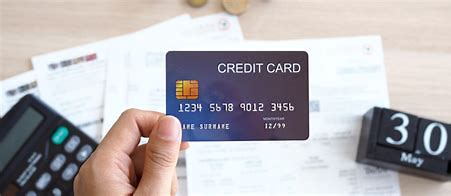

## About Dataset
Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

***
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, …   8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)
***

## ML LIFE CYCLE

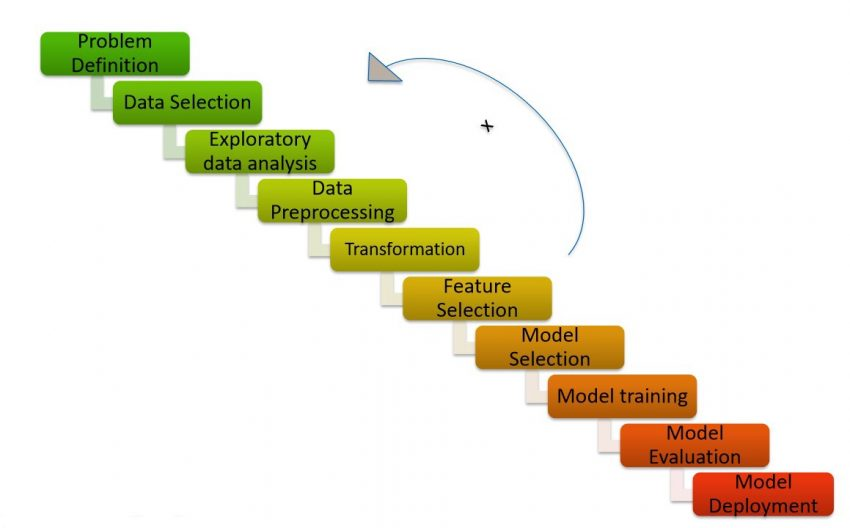

## <span style='color:Blue'>  ***📚 IMPORTING LIBRARIES.*** </span>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
data = pd.read_csv("UCI_Credit_Card.csv")
#data.head()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are NO NULL VALUES in the entire dataset...so, "HAPPY 🙃🙃🙃"

In [6]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Every column  in the dataset are in the required datatype.so, we No need to change datatypes..Again HAPPY🙃🙃🙃

In [7]:
len(data)

30000

In [8]:
data.drop(labels='ID',axis=1,inplace=True)


The "ID" Column is removed from the dataset .because the final outcome is not depend on the value of ID 

data.head()

In [9]:
data= data.drop_duplicates()

In [10]:
len(data)

29965

After dropping the duplicate rows, dataset contains 29965 rows {3000 rows to 29965 rows}

## <span style='color:Blue'>  ***BULIDING THE MODELS WITHOUT DOING ANY DATA PREPROCESSING,TRANSFORMATIONS, FEATURE SELECTION...etc.*** </span>

In [12]:
X =data.iloc[:,:-1]
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [13]:
y=data.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [17]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.810567296996663


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8201334816462736


In [20]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8233592880978865


## Version 2

# Exploratory Data Analysis(EDA)

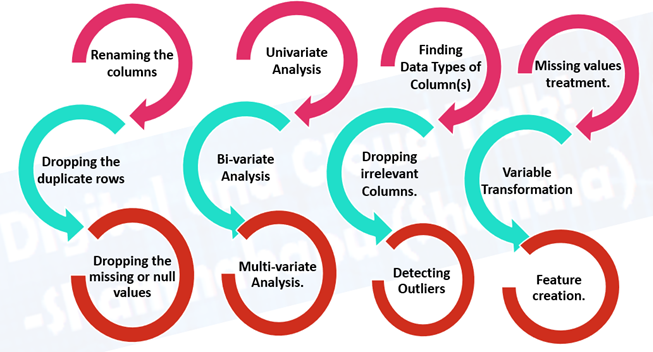

##### Renaming the columns,Finding dtypes of columns,Missing values tratment, Droping duplicate rows, Dropping irrelevant columns, Droping missing values...ALL these activities are already performed on the dataset...

## Univariate analysis on categorical data

#### In our dataset the categorical columns are :- 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',default.payment.next.month'],

-----

## NOTE:- 
 The different kind of plots which are available in matplotlib and seaborn to do univariate analysis are
### Categorical data visulaization(univariate):- count plot, pie chart and many more.....

#### count plot -> Count plot is the mostly used visualization plot for univarate analysis 
#### pie chart -> if  percentages have to displayed then pie chart used over count plot  ,


-----

### COUNT PLOT

0    23335
1     6630
Name: default.payment.next.month, dtype: int64

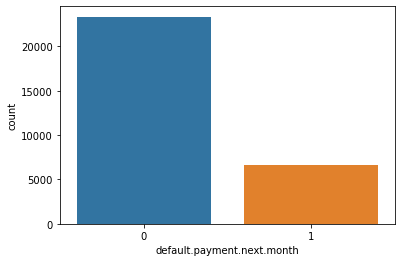

In [23]:
#default.payment.next.month: Default payment (1=yes, 0=no)
sns.countplot(data['default.payment.next.month'])
data['default.payment.next.month'].value_counts()

conclusion :- NO's count is very  much higher than yes's count..i.e,. imbalance data

---

In [48]:
## Univariate analysis on SEX Column

In [31]:
male_defaulters=len(data[(data['default.payment.next.month']) & (data['SEX']==1)])
female_defaulters=len(data[(data['default.payment.next.month']) & (data['SEX']==2)])

2869 3761


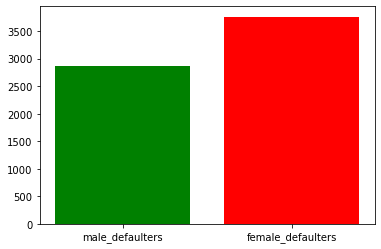

In [42]:
#SEX: Gender (1=male, 2=female)
plt.bar(['male_defaulters','female_defaulters'],[male_defaulters,female_defaulters],color=["green","red"])
print(male_defaulters,female_defaulters)

conclusion :- Female user's are more likely to become defaulter than male 😲🤯

---

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

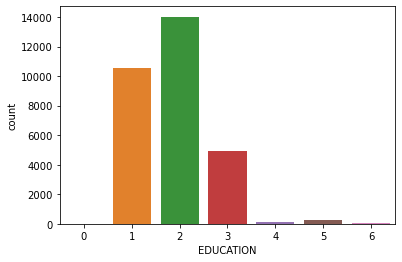

In [43]:
## Univariate analysis on EDUACATION Column
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
sns.countplot(data['EDUCATION'])
data['EDUCATION'].value_counts()

conclusion:- BOTH '5' and '6' belongs to UNKNOWN category ....and also 0 is present in the dataset but it is not mentioned in the Categories of education(#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

plan :- rename 5,6 ,0 to 4

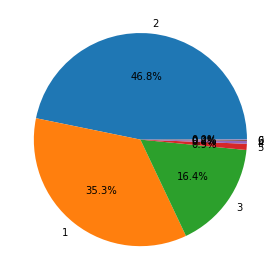

In [44]:
plt.pie(data['EDUCATION'].value_counts(),labels=data['EDUCATION'].value_counts().index,autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [45]:
data['EDUCATION'].value_counts().index

Int64Index([2, 1, 3, 5, 4, 6, 0], dtype='int64')

#data[data["EDUCATION"]==6]

In [46]:
# changing the dataset as per our requiremnet

# Storing the dataset  into new object 'df'

df =data.copy()
df['EDUCATION']=df["EDUCATION"].replace([0,5,6],4)
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

conclusion :- 0, 5 and 6  values present in the education column changed into 4("others") 

---

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

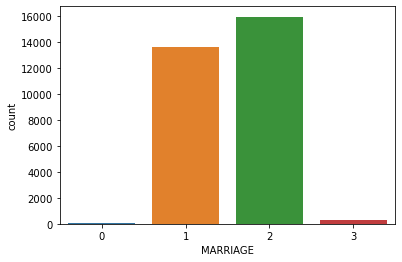

In [50]:
### Univariate analysis on MARRIAGE Column
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
sns.countplot(data['MARRIAGE'])
data['MARRIAGE'].value_counts()

conclusion :- Here also '0' is present ....which is not mentione the intial category labels..

plan :- rename '0' as 3

In [51]:
# Updating the marriage column
df['MARRIAGE']=df["MARRIAGE"].replace(0,3)
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

conclusion :- '0' converted into 3,..as there are only few '0 ' values , i convert that into  'other'(3) category

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

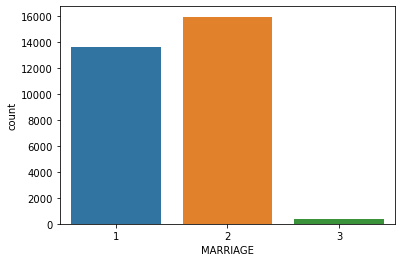

In [52]:
sns.countplot(df['MARRIAGE'])
df['MARRIAGE'].value_counts()

---

###### Univariate analysis on PAYColumn
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

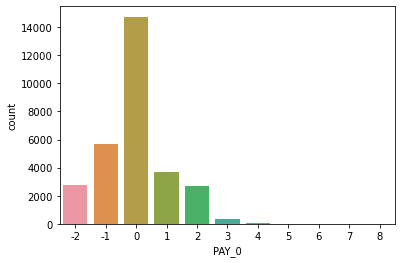

In [53]:
#PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
sns.countplot(data['PAY_0'])
data['PAY_0'].value_counts()

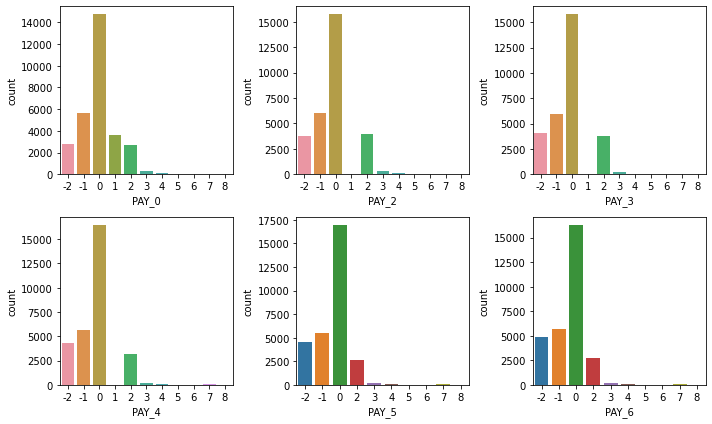

In [54]:
fig=plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.countplot(data['PAY_0'])
plt.subplot(2,3,2)
sns.countplot(data['PAY_2'])
plt.subplot(2,3,3)
sns.countplot(data['PAY_3'])
plt.subplot(2,3,4)
sns.countplot(data['PAY_4'])
plt.subplot(2,3,5)
sns.countplot(data['PAY_5'])
plt.subplot(2,3,6)
sns.countplot(data['PAY_6'])
plt.tight_layout()
plt.show()

conclusion :-  '9'(9=payment delay for nine months and above) is not present in none of the above pay columns (pay_0,pay_2..pay_6)

and also -2,0 are present..but they are present in categories of PAY's . so, i am not changing any values in the pay_coumns

### Univariate analysis on numerical data

### Numerical data visulaization(univariate):- Histogram, distplot,boxplot and many more.....

##### Numerical cloumns are :-'ID', 'LIMIT_BAL', BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'.

ID not required..alreay  that col is removed
    

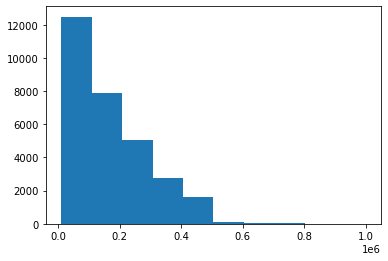

In [56]:
#LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
plt.hist(data['LIMIT_BAL'])
plt.show()

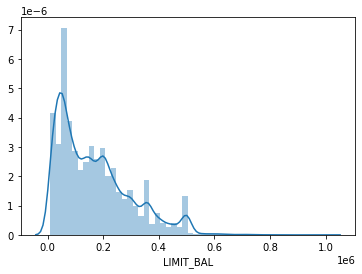

In [57]:
### dist plot :- PDF (probability distribution Function)
sns.distplot(data['LIMIT_BAL'])
plt.show()

In [58]:
data['LIMIT_BAL'].skew()

# 0 means symentric
# +ve right skew
# -ve left skew

0.9934913272313394

conclusion :- LIMIT BAL is right skewed.. we have to remove skewness

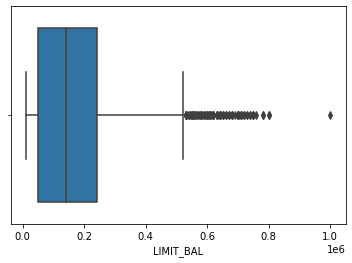

In [59]:
# box plot :- outlier detection
sns.boxplot(data['LIMIT_BAL'])
plt.show()

conclusion :- ' LIMIT BAL' has lot of outliers..we have to remove the outliers

plan :- skewness and outlier has to be  removed

In [60]:
# removing outliers
percentile25=df['LIMIT_BAL'].quantile(0.25)
percentile75=df['LIMIT_BAL'].quantile(0.75)
iqr = percentile75-percentile25


In [61]:
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
print(upper_limit,lower_limit)

525000.0 -235000.0


In [62]:
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL']>upper_limit,upper_limit,
                          np.where(df['LIMIT_BAL']<lower_limit,lower_limit,
                                  df['LIMIT_BAL']))

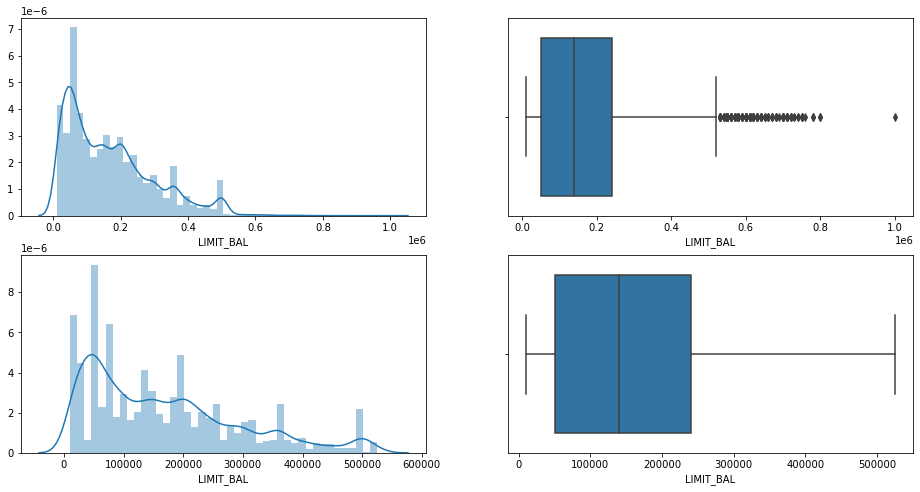

In [63]:
#before and after effects  (with and without ouliers)
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['LIMIT_BAL'])
plt.subplot(2,2,2)
sns.boxplot(data['LIMIT_BAL'])
plt.subplot(2,2,3)
sns.distplot(df['LIMIT_BAL'])
plt.subplot(2,2,4)
sns.boxplot(df['LIMIT_BAL'])
plt.show()

Conclusion :-  outliers present in the LIMIT_BAL  are removed  ✨🎉🧨🎇🎊

---

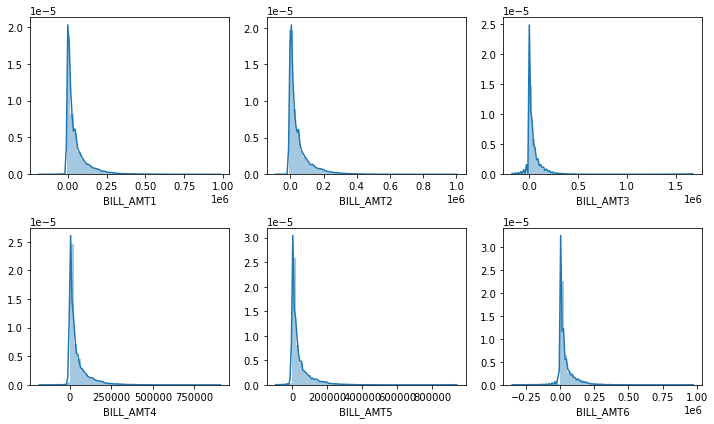

In [64]:
#  BILL AMOUNT UNI VARIARTE
fig=plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.distplot(data['BILL_AMT1'])
plt.subplot(2,3,2)
sns.distplot(data['BILL_AMT2'])
plt.subplot(2,3,3)
sns.distplot(data['BILL_AMT3'])
plt.subplot(2,3,4)
sns.distplot(data['BILL_AMT4'])
plt.subplot(2,3,5)
sns.distplot(data['BILL_AMT5'])
plt.subplot(2,3,6)
sns.distplot(data['BILL_AMT6'])
plt.tight_layout()
plt.show()

concluson :- ALL BILL AMOUNT columns are righ skewed..

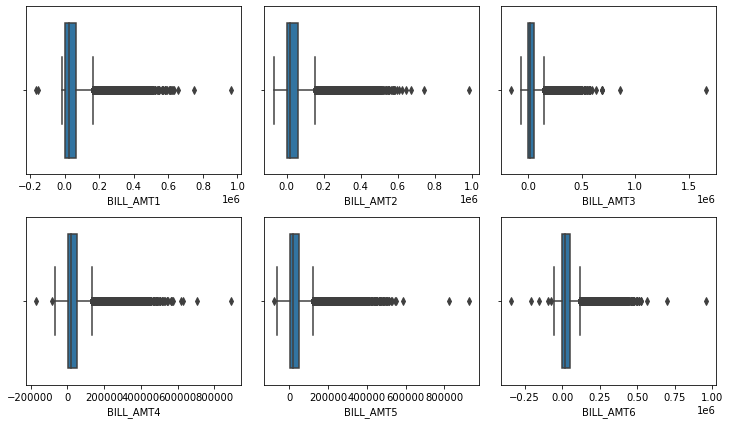

In [65]:
fig=plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.boxplot(data['BILL_AMT1'])
plt.subplot(2,3,2)
sns.boxplot(data['BILL_AMT2'])
plt.subplot(2,3,3)
sns.boxplot(data['BILL_AMT3'])
plt.subplot(2,3,4)
sns.boxplot(data['BILL_AMT4'])
plt.subplot(2,3,5)
sns.boxplot(data['BILL_AMT5'])
plt.subplot(2,3,6)
sns.boxplot(data['BILL_AMT6'])
plt.tight_layout()
plt.show()

conclusion :- All BILL AMOUNT columns contains outliers

#### ouliers removing------ BILL_AMOUNT

In [66]:
# removing outliers
percentile25=df['BILL_AMT1'].quantile(0.25)
percentile75=df['BILL_AMT1'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['BILL_AMT1'] = np.where(df['BILL_AMT1']>upper_limit,upper_limit,
                          np.where(df['BILL_AMT1']<lower_limit,lower_limit,
                                  df['BILL_AMT1']))

In [67]:
percentile25=df['BILL_AMT2'].quantile(0.25)
percentile75=df['BILL_AMT2'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['BILL_AMT2'] = np.where(df['BILL_AMT2']>upper_limit,upper_limit,
                          np.where(df['BILL_AMT2']<lower_limit,lower_limit,
                                  df['BILL_AMT2']))

In [68]:
percentile25=df['BILL_AMT3'].quantile(0.25)
percentile75=df['BILL_AMT3'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['BILL_AMT3'] = np.where(df['BILL_AMT3']>upper_limit,upper_limit,
                          np.where(df['BILL_AMT3']<lower_limit,lower_limit,
                                  df['BILL_AMT3']))

In [69]:
percentile25=df['BILL_AMT4'].quantile(0.25)
percentile75=df['BILL_AMT4'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['BILL_AMT4'] = np.where(df['BILL_AMT4']>upper_limit,upper_limit,
                          np.where(df['BILL_AMT4']<lower_limit,lower_limit,
                                  df['BILL_AMT4']))

In [70]:
percentile25=df['BILL_AMT5'].quantile(0.25)
percentile75=df['BILL_AMT5'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['BILL_AMT5'] = np.where(df['BILL_AMT5']>upper_limit,upper_limit,
                          np.where(df['BILL_AMT5']<lower_limit,lower_limit,
                                  df['BILL_AMT5']))

In [71]:
percentile25=df['BILL_AMT6'].quantile(0.25)
percentile75=df['BILL_AMT6'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['BILL_AMT6'] = np.where(df['BILL_AMT6']>upper_limit,upper_limit,
                          np.where(df['BILL_AMT6']<lower_limit,lower_limit,
                                  df['BILL_AMT6']))

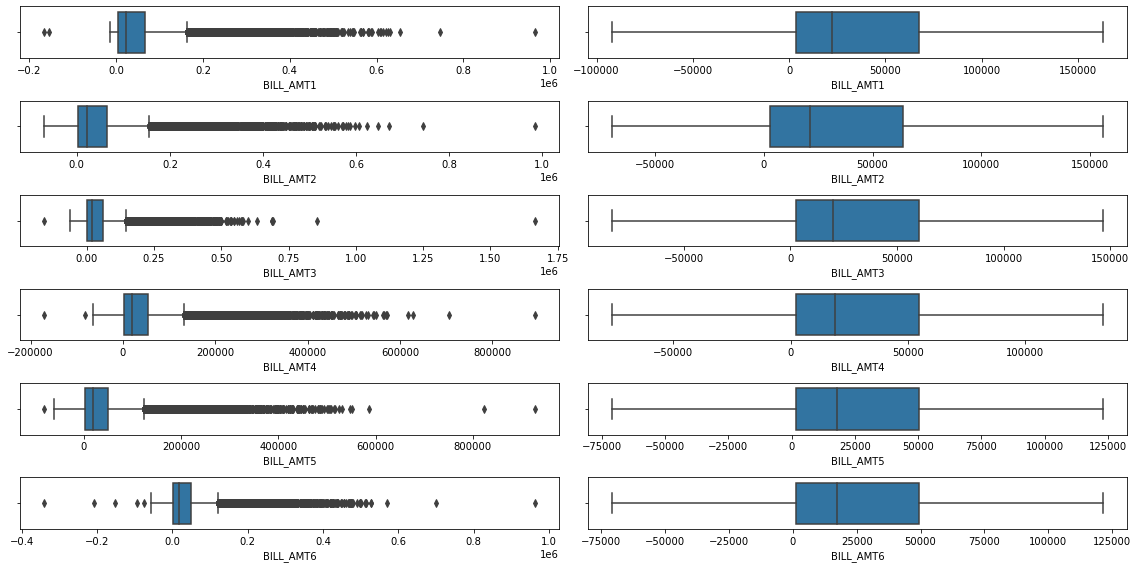

In [72]:
# with and without outliers box plots

fig=plt.figure(figsize=(16,8))
plt.subplot(6,2,1)
sns.boxplot(data['BILL_AMT1'])
plt.subplot(6,2,2)
sns.boxplot(df['BILL_AMT1'])
plt.subplot(6,2,3)
sns.boxplot(data['BILL_AMT2'])
plt.subplot(6,2,4)
sns.boxplot(df['BILL_AMT2'])
plt.subplot(6,2,5)
sns.boxplot(data['BILL_AMT3'])
plt.subplot(6,2,6)
sns.boxplot(df['BILL_AMT3'])
plt.subplot(6,2,7)
sns.boxplot(data['BILL_AMT4'])
plt.subplot(6,2,8)
sns.boxplot(df['BILL_AMT4'])
plt.subplot(6,2,9)
sns.boxplot(data['BILL_AMT5'])
plt.subplot(6,2,10)
sns.boxplot(df['BILL_AMT5'])
plt.subplot(6,2,11)
sns.boxplot(data['BILL_AMT6'])
plt.subplot(6,2,12)
sns.boxplot(df['BILL_AMT6'])
plt.tight_layout()
plt.show()

Conclusion :-  outliers present in the BILL_AMOUNT Columns  are removed  ✨🎉🧨🎇🎊

---

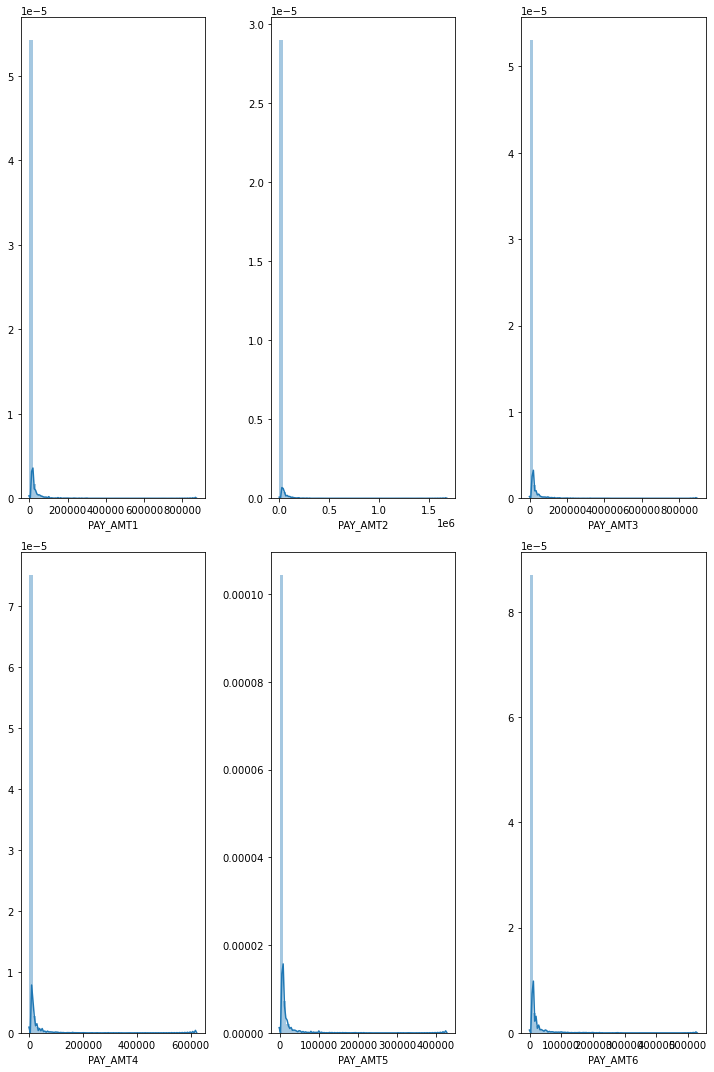

In [73]:
# PAY_AMOUNT COlumns
fig=plt.figure(figsize=(10,15))
plt.subplot(2,3,1)
sns.distplot(data['PAY_AMT1'])
plt.subplot(2,3,2)
sns.distplot(data['PAY_AMT2'])
plt.subplot(2,3,3)
sns.distplot(data['PAY_AMT3'])
plt.subplot(2,3,4)
sns.distplot(data['PAY_AMT4'])
plt.subplot(2,3,5)
sns.distplot(data['PAY_AMT5'])
plt.subplot(2,3,6)
sns.distplot(data['PAY_AMT6'])
plt.tight_layout()
plt.show()

In [74]:
# PAY AMT's and thier skewness
print(" PAY Amount1 skewness ",data['PAY_AMT1'].skew())
print(" PAY Amount2 skewness ",data['PAY_AMT2'].skew())
print(" PAY Amount3 skewness ",data['PAY_AMT3'].skew())
print(" PAY Amount4 skewness ",data['PAY_AMT4'].skew())
print(" PAY Amount5 skewness ",data['PAY_AMT5'].skew())
print(" PAY Amount6 skewness ",data['PAY_AMT6'].skew())


 PAY Amount1 skewness  14.661594536980381
 PAY Amount2 skewness  30.43861292125699
 PAY Amount3 skewness  17.20817659893814
 PAY Amount4 skewness  12.898506491831633
 PAY Amount5 skewness  11.121741740064401
 PAY Amount6 skewness  10.635093970597959


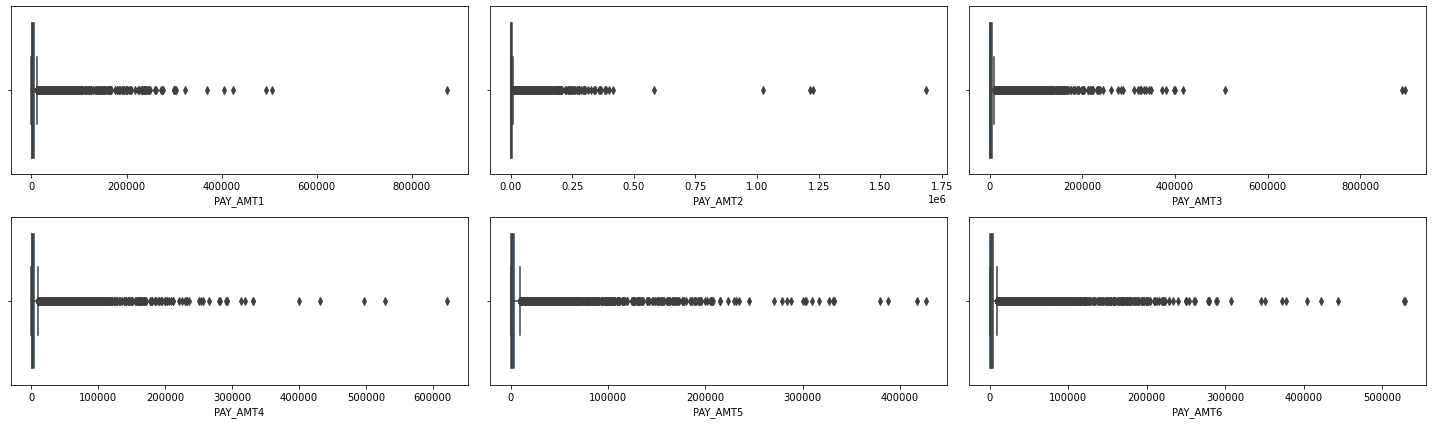

In [75]:
fig=plt.figure(figsize=(20,6))
plt.subplot(2,3,1)
sns.boxplot(data['PAY_AMT1'])
plt.subplot(2,3,2)
sns.boxplot(data['PAY_AMT2'])
plt.subplot(2,3,3)
sns.boxplot(data['PAY_AMT3'])
plt.subplot(2,3,4)
sns.boxplot(data['PAY_AMT4'])
plt.subplot(2,3,5)
sns.boxplot(data['PAY_AMT5'])
plt.subplot(2,3,6)
sns.boxplot(data['PAY_AMT6'])
plt.tight_layout()
plt.show()

conclusion :- ALl pay AMOUNTS  cols contains outliers

OUTLIER DELETION IN PAY AMOUNT COLUMNS

In [76]:
# removing outliers
percentile25=df['PAY_AMT1'].quantile(0.25)
percentile75=df['PAY_AMT1'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['PAY_AMT1'] = np.where(df['PAY_AMT1']>upper_limit,upper_limit,
                          np.where(df['PAY_AMT1']<lower_limit,lower_limit,
                                  df['PAY_AMT1']))

In [77]:
# removing outliers
percentile25=df['PAY_AMT2'].quantile(0.25)
percentile75=df['PAY_AMT2'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['PAY_AMT2'] = np.where(df['PAY_AMT2']>upper_limit,upper_limit,
                          np.where(df['PAY_AMT2']<lower_limit,lower_limit,
                                  df['PAY_AMT2']))

In [78]:
# removing outliers
percentile25=df['PAY_AMT3'].quantile(0.25)
percentile75=df['PAY_AMT3'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['PAY_AMT3'] = np.where(df['PAY_AMT3']>upper_limit,upper_limit,
                          np.where(df['PAY_AMT3']<lower_limit,lower_limit,
                                  df['PAY_AMT3']))

In [79]:
# removing outliers
percentile25=df['PAY_AMT4'].quantile(0.25)
percentile75=df['PAY_AMT4'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['PAY_AMT4'] = np.where(df['PAY_AMT4']>upper_limit,upper_limit,
                          np.where(df['PAY_AMT4']<lower_limit,lower_limit,
                                  df['PAY_AMT4']))

In [80]:
# removing outliers
percentile25=df['PAY_AMT5'].quantile(0.25)
percentile75=df['PAY_AMT5'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['PAY_AMT5'] = np.where(df['PAY_AMT5']>upper_limit,upper_limit,
                          np.where(df['PAY_AMT5']<lower_limit,lower_limit,
                                  df['PAY_AMT5']))

In [81]:
# removing outliers
percentile25=df['PAY_AMT6'].quantile(0.25)
percentile75=df['PAY_AMT6'].quantile(0.75)
iqr = percentile75-percentile25
upper_limit =percentile75+1.5*iqr
lower_limit =percentile25-1.5*iqr
#print(upper_limit,lower_limit)
df['PAY_AMT6'] = np.where(df['PAY_AMT6']>upper_limit,upper_limit,
                          np.where(df['PAY_AMT6']<lower_limit,lower_limit,
                                  df['PAY_AMT6']))

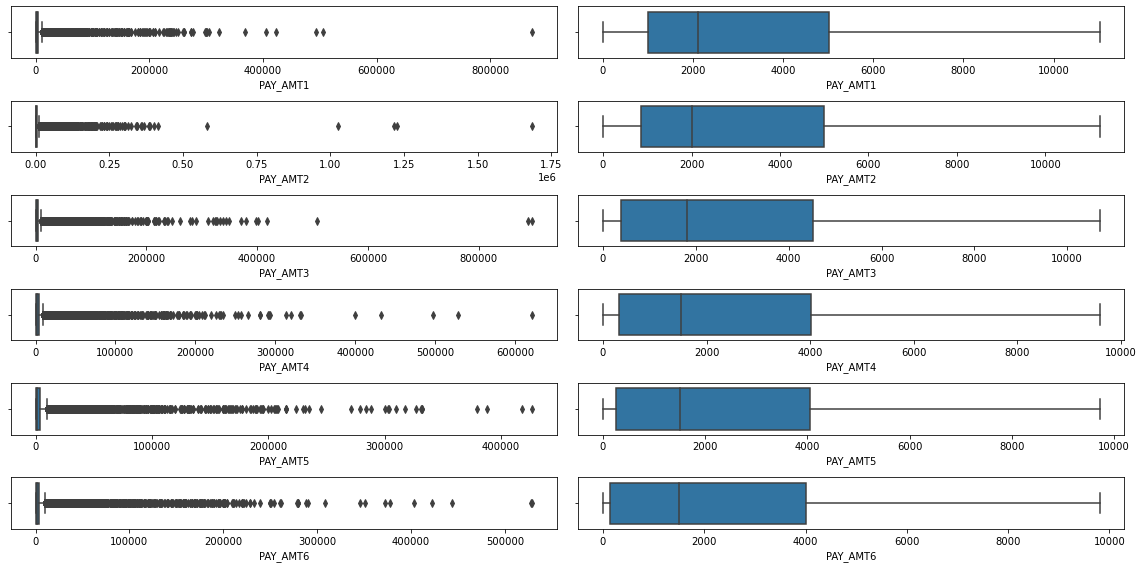

In [82]:
fig=plt.figure(figsize=(16,8))
plt.subplot(6,2,1)
sns.boxplot(data['PAY_AMT1'])
plt.subplot(6,2,2)
sns.boxplot(df['PAY_AMT1'])
plt.subplot(6,2,3)
sns.boxplot(data['PAY_AMT2'])
plt.subplot(6,2,4)
sns.boxplot(df['PAY_AMT2'])
plt.subplot(6,2,5)
sns.boxplot(data['PAY_AMT3'])
plt.subplot(6,2,6)
sns.boxplot(df['PAY_AMT3'])
plt.subplot(6,2,7)
sns.boxplot(data['PAY_AMT4'])
plt.subplot(6,2,8)
sns.boxplot(df['PAY_AMT4'])
plt.subplot(6,2,9)
sns.boxplot(data['PAY_AMT5'])
plt.subplot(6,2,10)
sns.boxplot(df['PAY_AMT5'])
plt.subplot(6,2,11)
sns.boxplot(data['PAY_AMT6'])
plt.subplot(6,2,12)
sns.boxplot(df['PAY_AMT6'])
plt.tight_layout()
plt.show()

Conclusion :-  outliers present in the PAY_AMT  are removed  ✨🎉🧨🎇🎊

---

### Buliding models ,AFTER DELETING OUTLIERS IN COLUMNS AND REPLACING THE EXISTING VALUES WITH THE APPROPIATE VALUES .....
####  PERFORMING TRAIN AND TESTING ON THE DATA ...LET SEE MODELS PERFORMANCE

In [85]:
X1 =df.iloc[:,:-1]
X1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,11225.0,10000.0,9000.0,689.0,679.0


In [87]:
y1=df.iloc[:,-1]
y1.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=3)

In [93]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [94]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8096774193548387


In [95]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8206896551724138


In [96]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8242491657397107


### Conclusion :-After deletion of outliers in the columns are is a  very small  change in the accuracies values 😥🤔🤔

## BIVARIATE AND MULTIVARIATE ANALYSIS
 * In Bivariate  analysis , if we add parameters like hue,size,style to the plots then we can do Multivariate analysis
 * example :_ sns.scatterplot(x,y) -> bivariate
 * sns.scatterplot(x,y,hue=z) -> multivaraite

* Scatterplot -> numerical - numerical
* barplot => numerical - categorical
* Box plot => numerical - categorical
* Distplot => numerical - categorical
* Heat map => categorical - categorical
* cluster map  categorical - categorical
* pair plot
* Line plot  => numerical - numerical(similar to scatter plot , used when we have to plot w.r.t date, time, month...date&time ) )

#### Scatter plot

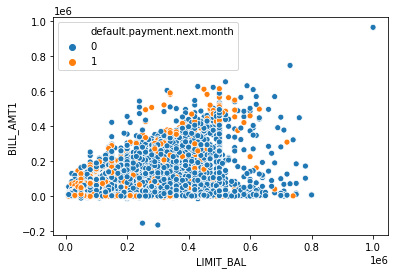

In [97]:
sns.scatterplot(data['LIMIT_BAL'],data['BILL_AMT1'],hue=data['default.payment.next.month'])
plt.show()

conclusion :- no correlation

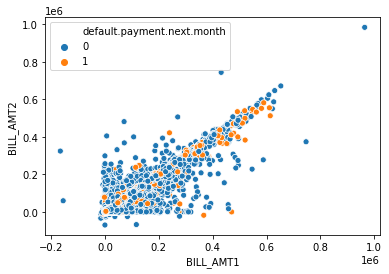

In [98]:
sns.scatterplot(data['BILL_AMT1'],data['BILL_AMT2'],hue=data['default.payment.next.month'])
plt.show()

#Conclusion :-  The realtionship between BILL Amount(one coloumn) with another bill amount colum is postive correlated

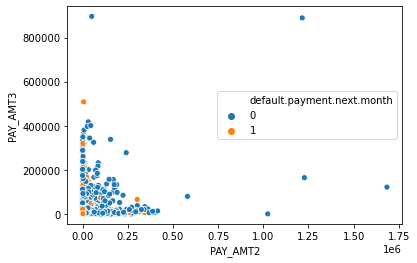

In [99]:
sns.scatterplot(data['PAY_AMT2'],data['PAY_AMT3'],hue=data['default.payment.next.month'])
plt.show()

conclusion :- There is no clear cut realtionship between  PAY Amount(one coloumn) with another PAY amount  column

### BAR plot

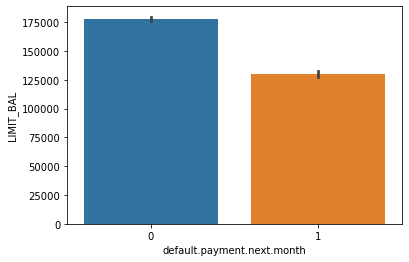

In [101]:
sns.barplot(data['default.payment.next.month'],data['LIMIT_BAL'])

conclusion :-the people who are paying amount properly have  high avg limit balance 

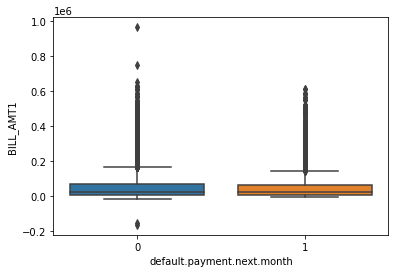

In [102]:
sns.boxplot(data['default.payment.next.month'],data['BILL_AMT1'])

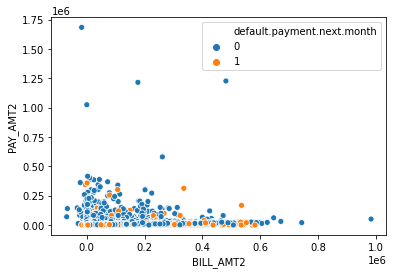

In [103]:
#BILL AMOUNT VS PAYAMOUNT
sns.scatterplot(data['BILL_AMT2'],data['PAY_AMT2'],hue=data['default.payment.next.month'])
plt.show()

con:- No clear relationship b/w BILL and PAY Amount cloumns 

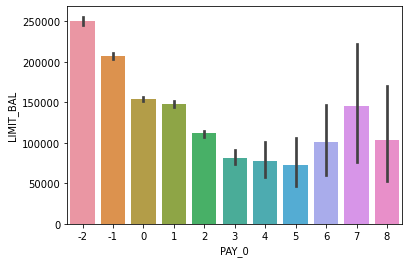

In [104]:
# PAY_0 vs LIMIT_BAL
sns.barplot(data['PAY_0'],data['LIMIT_BAL'])

conclusion:- Those who are paying in time there limit_balance is high

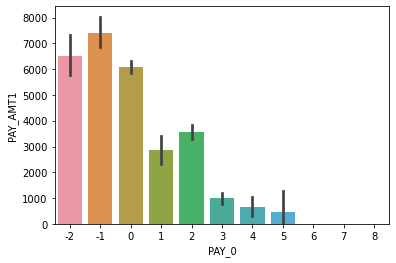

In [105]:
# PAY_0 vs PAY_AMOUNT
sns.barplot(data['PAY_0'],data['PAY_AMT1'])

In [106]:
# EDUCATION VS DEFALUT PAYMENT
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
pd.crosstab(data['EDUCATION'],data['default.payment.next.month'])

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8531,2032
2,10691,3328
3,3678,1237
4,116,7
5,262,18
6,43,8


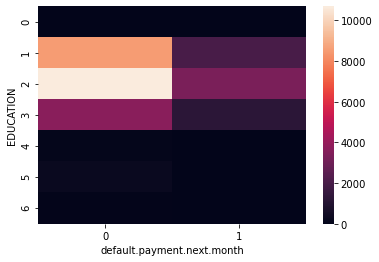

In [107]:
# EDUCATION VS DEFALUT PAYMENT
sns.heatmap(pd.crosstab(data['EDUCATION'],data['default.payment.next.month']))

pair plot

In [ ]:
#sns.pairplot(df)

---

# Version 3

Buliding modles after doing PCA

In [ ]:
#df.drop("ID",axis=1,inplace=True)


In [ ]:
df.head()

In [108]:
X =df.iloc[:,:-1]
X.head()
X.shape

(29965, 23)

In [109]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=33)

In [111]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#PCA 
# pca with 23 dimensions same as orginal dimensions
from sklearn.decomposition import PCA
pca =PCA()

In [ ]:
X_train=pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

---

# version 4
 ### buliding different ml models

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=33)
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [113]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
lr_pred = reg.predict(X_test)

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dt_pred = dtc.predict(X_test)

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rf_pred = rfc.predict(X_test)

In [116]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

! pip install threadpoolctl==3.1.0

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [118]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
naive_pred = gnb.predict(X_test)

In [119]:
print("LR accuracy :",accuracy_score(y_test,lr_pred))
print("DT accuracy :",accuracy_score(y_test,dt_pred))
print("RF accuracy :",accuracy_score(y_test,rf_pred))
print("svc accuracy :",accuracy_score(y_test,svc_pred))
print("knn accuracy :",accuracy_score(y_test,knn_pred))
print("naive bayes accuracy :",accuracy_score(y_test,naive_pred))


LR accuracy : 0.8083426028921024
DT accuracy : 0.7197997775305895
RF accuracy : 0.8175750834260289
svc accuracy : 0.818131256952169
knn accuracy : 0.7917686318131257
naive bayes accuracy : 0.7853170189098999


conclusion :- SVC, RF models are performing well than other models

---

# Version 5

The count of '0''s in the target column is higher than 1's..i.e. imbalaced data

### Oversampling data using SMOTE

In [120]:
import imblearn
from collections import Counter

!pip install imbalanced-learn

In [122]:
df.head()
df['default.payment.next.month'] =df['default.payment.next.month'].astype(int)

In [123]:
df.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int32
dtype: object

In [ ]:
#from imblearn.over_sampling import ADASYN

In [124]:
X=df.drop('default.payment.next.month',axis=1)
y=df['default.payment.next.month']

In [125]:
#X.head()
#print(y.dtype)
y.value_counts()

0    23335
1     6630
Name: default.payment.next.month, dtype: int64

In [126]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)


In [127]:
y_sm.value_counts()

1    23335
0    23335
Name: default.payment.next.month, dtype: int64

In [128]:
 np.unique(y_sm, return_counts=True)
    

(array([0, 1]), array([23335, 23335], dtype=int64))

In [129]:
(y_sm==0).sum()

23335

In [ ]:
#oversample = ADASYN()
#X, y = oversample.fit_resample(X, y)

In [ ]:
#np.unique(y, return_counts=True)

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=33,stratify=y_sm)
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [131]:
y_train.value_counts()

1    18668
0    18668
Name: default.payment.next.month, dtype: int64

In [132]:
y_test.value_counts()

1    4667
0    4667
Name: default.payment.next.month, dtype: int64

###  NOW  dataset is  balanced  🎇🎇🎇🎆🎉🎉✨✨

In [133]:
reg1 = LogisticRegression()
reg1.fit(X_train, y_train)
lr_pred = reg1.predict(X_test)

In [134]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)
rf_pred = rfc1.predict(X_test)

In [135]:
svc1 = SVC()
svc1.fit(X_train, y_train)
svc_pred = svc1.predict(X_test)

In [136]:
print("LR accuracy :",accuracy_score(y_test,lr_pred))
print("RF accuracy :",accuracy_score(y_test,rf_pred))
print("svc accuracy :",accuracy_score(y_test,svc_pred))

LR accuracy : 0.7323762588386544
RF accuracy : 0.8460467109492179
svc accuracy : 0.774908935076066


### After doing oversampling the accuracies of logistic and svc are reduced , only random forest accury is incresed

---

## Version 6

### hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100,stop=200,num=10)]
max_features =['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,100,10)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4,6]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']
            }

In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=2,verbose=2,random_state=33,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

In [ ]:
best_params=rf_randomcv.best_params_
best_params

In [ ]:
model = RandomForestClassifier(n_estimators= 200,
         min_samples_split= 2,
         min_samples_leaf= 2,
         max_features= 'log2',
         max_depth= 70,
         criterion= 'entropy')
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

In [ ]:
#best_random_grid=rf_randomcv.best_estimator_

In [ ]:
#y_pred=best_random_grid.predict(X_test)


In [ ]:
accuracy_score(y_test,model_pred)

In [ ]:
#0.8411184915363188

---

# version 7
#### performance metrics

In [ ]:
# Accuracy for balanced dataset(( class A:50% , ClassB :50%),( class A:60% , ClassB :40%),( class A:70% , ClassB :30%)  )
# precison and recall, f1 score for imbalanced dataset(( class A:80% , ClassB :20%)...if one of the class labels are greather than 80%)
# ROC for find the best thresold limit for classification (" in logistic regresssion default thresold is 0.5, for diff .scenarios this need to be calculated")
# Auc score for the best model b\w diff models (" the model having more AUC score is the best")

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print("precision :%.3f"%precision_score(y_test,model_pred))
print("recall :%.3f"%recall_score(y_test,model_pred))
print("accuracy :%.3f"%accuracy_score(y_test,model_pred))
print("F1 :%.3f"%f1_score(y_test,model_pred))

In [ ]:
# ROC ,AUC  i will do later 

In [ ]:
df.iloc[3]

---

## Version 8

### Deployment 

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open("model.pkl",'wb'))

## Version 9
## Using sklearn.pipeline --end to end 

In [ ]:
#plan :- 1)outlier deletion :- idk how to perform  , 2)scalling  3)feature Selection 4) model

In [ ]:
data9=data.copy()

In [ ]:
data9.head()

In [ ]:
data9['MARRIAGE'].value_counts()

In [ ]:
data9['EDUCATION']=data9["EDUCATION"].replace([0,5,6],4)

In [ ]:
data9['MARRIAGE']=data9["MARRIAGE"].replace(0,3)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
X_train9,X_test9,y_train9,y_test9=train_test_split(data9.drop(columns=['default.payment.next.month']),
                                                   data9['default.payment.next.month'],test_size=0.2,random_state=33)

In [ ]:
# Scalling 
trf1 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,23))
    
])

In [ ]:
# feature selection

#trf2=SelectKBest(score_func=chi2,k=10)

In [ ]:
# model
trf2=RandomForestClassifier(n_estimators= 200,
         min_samples_split= 2,
         min_samples_leaf= 2,
         max_features= 'log2',
         max_depth= 70,
         criterion= 'entropy')

In [ ]:
# pipeline

pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
    
])

In [ ]:
pipe.fit(X_train9,y_train9)

In [ ]:
y_pred9=pipe.predict(X_test9)

In [ ]:
print("precision :%.3f"%precision_score(y_test9,y_pred9))
print("recall :%.3f"%recall_score(y_test9,y_pred9))
print("accuracy :%.3f"%accuracy_score(y_test9,y_pred9))
print("F1 :%.3f"%f1_score(y_test9,y_pred9))

In [ ]:
### Cross validation using pipeline

from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train9,y_train9,cv=5,scoring='accuracy').mean()

In [ ]:
## Randomcv using pipeline


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100,stop=200,num=10)]
max_features =['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,100,10)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4,6]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']
            }

In [ ]:
rf9=RandomForestClassifier()
rf_randomcv9=RandomizedSearchCV(estimator=rf9,param_distributions=random_grid,n_iter=5,cv=2,verbose=2,random_state=33,n_jobs=-1)
rf_randomcv9.fit(X_train9,y_train9)

In [ ]:
best_params=rf_randomcv9.best_params_
best_params

In [ ]:
rf_randomcv9.best_score_

In [ ]:
# EXporting the pipeline

pickle.dump(pipe,open('pipe.pkl','wb'))

----

# THE END 🎊🥰😎😋🙂🙂🙂🙂🎇🎉✨🧨